In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Part A

In [3]:
# Set seed for reproducibility
np.random.seed(123)

In [4]:
# Random sample of 25 observations
df_sample = df.sample(n=25)

Sample mean glucose: 130.36
Population mean glucose: 120.89453125
Sample highest glucose: 197
Population highest glucose: 199


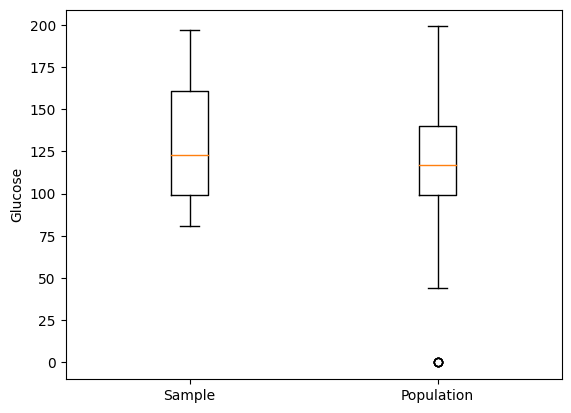

In [5]:
# Calculate mean and max glucose values of sample
sample_mean_glucose = df_sample['Glucose'].mean()
sample_max_glucose = df_sample['Glucose'].max()

# Calculate mean and max glucose values of population
df_mean_glucose = df['Glucose'].mean()
df_max_glucose = df['Glucose'].max()

# Report
print("Sample mean glucose:", sample_mean_glucose)
print("Population mean glucose:", df_mean_glucose)
print("Sample highest glucose:", sample_max_glucose)
print("Population highest glucose:", df_max_glucose)

# Plot
fig, ax = plt.subplots()
ax.boxplot([df_sample['Glucose'], df['Glucose']])
ax.set_xticklabels(['Sample', 'Population'])
ax.set_ylabel('Glucose')
plt.show()

## Part B

Sample 98th percentile BMI: 45.263999999999996
Population 98th percentile BMI: 47.52599999999996


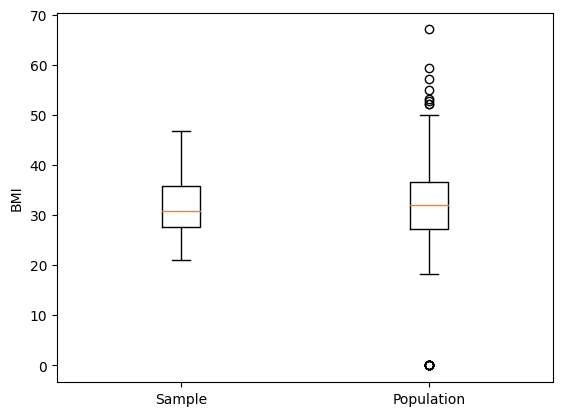

In [6]:
# Find the 98th percentile BMI for sample and population
sample_98th_percentile_bmi = np.percentile(df_sample['BMI'], 98)
df_98th_percentile_bmi = np.percentile(df['BMI'], 98)

# Report
print("Sample 98th percentile BMI:", sample_98th_percentile_bmi)
print("Population 98th percentile BMI:", df_98th_percentile_bmi)

# Plot
fig, ax = plt.subplots()
ax.boxplot([df_sample['BMI'], df['BMI']])
ax.set_xticklabels(['Sample', 'Population'])
ax.set_ylabel('BMI')
plt.show()

## Part C

In [7]:
# Declare list
sample_means = np.zeros(500)
sample_stds = np.zeros(500)
sample_98th_percentiles = np.zeros(500)

# Create 500 bootstrap samples with size of 150 obeservations
for i in range(500):
    temp_sample = np.random.choice(df['BloodPressure'], 150, replace=True)
    
    # Append it into list
    sample_means[i] = temp_sample.mean()
    sample_stds[i] = temp_sample.std()
    sample_98th_percentiles[i] = np.percentile(temp_sample, 98)

Population mean blood pressure: 69.10546875
Bootstrap mean blood pressure: 69.15464
Population standard deviation of blood pressure: 19.355807170644777
Bootstrap standard deviation of blood pressure: 19.140748280552828
Population 98th percentile of blood pressure: 99.31999999999994
Bootstrap 98th percentile of blood pressure: 98.02348000000003


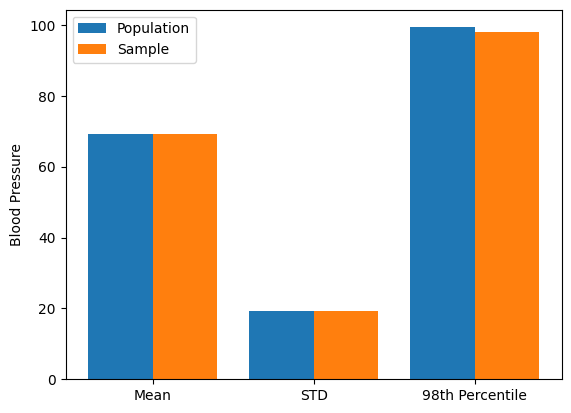

In [8]:
# Calculate the mean, standard deviation, and 98th percentile of bootstrap sample
sample_mean_bp = sample_means.mean()
sample_std_bp = sample_stds.mean()
sample_98th_percentile_bp = sample_98th_percentiles.mean()

# Calculate the mean, standard deviation, and 98th percentile of population
df_mean_bp = df['BloodPressure'].mean()
df_std_bp = df['BloodPressure'].std()
df_98th_percentile_bp = np.percentile(df['BloodPressure'], 98)

# Print the results
print("Population mean blood pressure:", df_mean_bp)
print("Bootstrap mean blood pressure:", sample_mean_bp)
print("Population standard deviation of blood pressure:", df_std_bp)
print("Bootstrap standard deviation of blood pressure:", sample_std_bp)
print("Population 98th percentile of blood pressure:", df_98th_percentile_bp)
print("Bootstrap 98th percentile of blood pressure:", sample_98th_percentile_bp)

# Plot
X = ["Mean","STD","98th Percentile"]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, [df_mean_bp,df_std_bp,df_98th_percentile_bp], 0.4, label = 'Population')
plt.bar(X_axis + 0.2, [sample_mean_bp,sample_std_bp,sample_98th_percentile_bp], 0.4, label = 'Sample')
plt.xticks(X_axis, X)
plt.ylabel("Blood Pressure")
plt.legend()
plt.show()